In [1]:
from helpers import * 

In [22]:
s3=s3_connection("aayrapetyan")
df=s3.get_tables_from_s3("aayrapetyan/diffusion/final_table.parquet")
df.sample(3)

connection successful


,total_voyageurs_2022,nom_gare,uic,codeinsee,lon_gare,lat_gare,codecommune,nomcommune,pop2022,revmoy2022,pbac2022,psup2022,dist_closest_station_km,nb_stations_same_commune,regions
1045,93329,Saint-Florentin - Vergigny,87683318,89439,3.731036,47.981058,89439,VERGIGNY,1607.0,13919.564,0.239269,0.142466,16.1,1,Bourgogne-Franche-Comté
482,1745412,Survilliers - Fosses,87276261,95250,2.525270,49.099610,95250,FOSSES,9693.0,17627.902,0.485830,0.273746,3.4,1,Île-de-France
373,5129,Pont d'Ardres,87281410,62038,1.971214,50.892078,62038,ARDRES,4588.0,15768.643,0.398671,0.268801,3.8,1,Hauts-de-France


In [23]:
aggregated_stats = calculate(
    df,
    group=["regions"],
    fields=["total_voyageurs_2022", "pop2022", "revmoy2022", "pbac2022", "psup2022"],
    stats=["sum", "sum", "mean", "mean", "mean"],
    names=[
        "sum_voy_region",
        "sum_pop_region",
        "avg_rev_region",
        "avg_pbac_region",
        "avg_psup_region",
    ],
)
df = df.merge(aggregated_stats, on="regions", how="inner")

In [24]:
df.sample(1)

,total_voyageurs_2022,nom_gare,uic,codeinsee,lon_gare,lat_gare,codecommune,nomcommune,pop2022,revmoy2022,pbac2022,psup2022,dist_closest_station_km,nb_stations_same_commune,regions,sum_voy_region,sum_pop_region,avg_rev_region,avg_pbac_region,avg_psup_region
2018,272986,Massy - Verrières,87383281,91377,2.273672,48.73431,91377,MASSY,58223.0,17946.115,0.672867,0.538849,1.3,3,Île-de-France,1411907509,12326097.0,23315.692376,0.5784,0.415808


In [25]:
df.columns

Index(['total_voyageurs_2022', 'nom_gare', 'uic', 'codeinsee', 'lon_gare',
       'lat_gare', 'codecommune', 'nomcommune', 'pop2022', 'revmoy2022',
       'pbac2022', 'psup2022', 'dist_closest_station_km',
       'nb_stations_same_commune', 'regions', 'sum_voy_region',
       'sum_pop_region', 'avg_rev_region', 'avg_pbac_region',
       'avg_psup_region'],
      dtype='object')

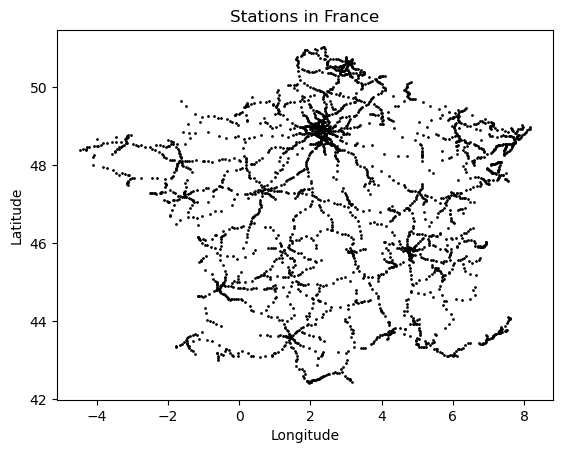

In [15]:
simple_plot_map(lat=df["lat_gare"],lon=df["lon_gare"])

nb removed observations :  18


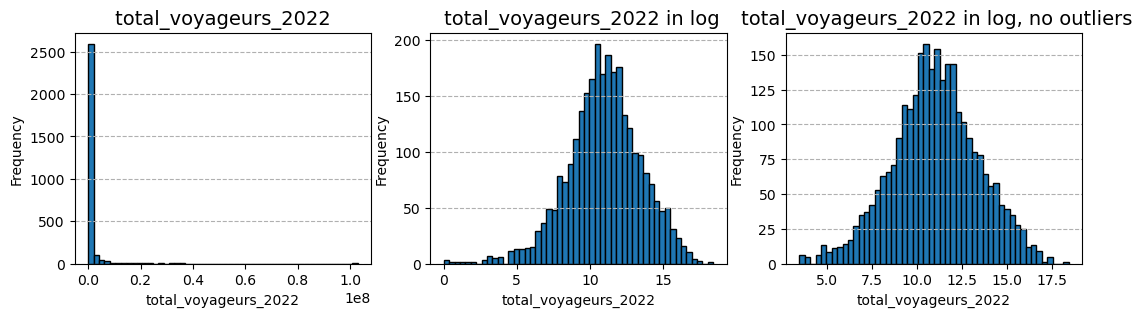

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(13, 3))  # 3 rows, 1 column of plots
no_outliers_table=delete_outliers_z_score(df,np.log(df["total_voyageurs_2022"]))
plot_hist(axs[0], df['total_voyageurs_2022'], title_suffix="")
plot_hist(axs[1], np.log(df['total_voyageurs_2022']), title_suffix="in log")
plot_hist(axs[2], np.log(no_outliers_table['total_voyageurs_2022']), title_suffix="in log, no outliers")

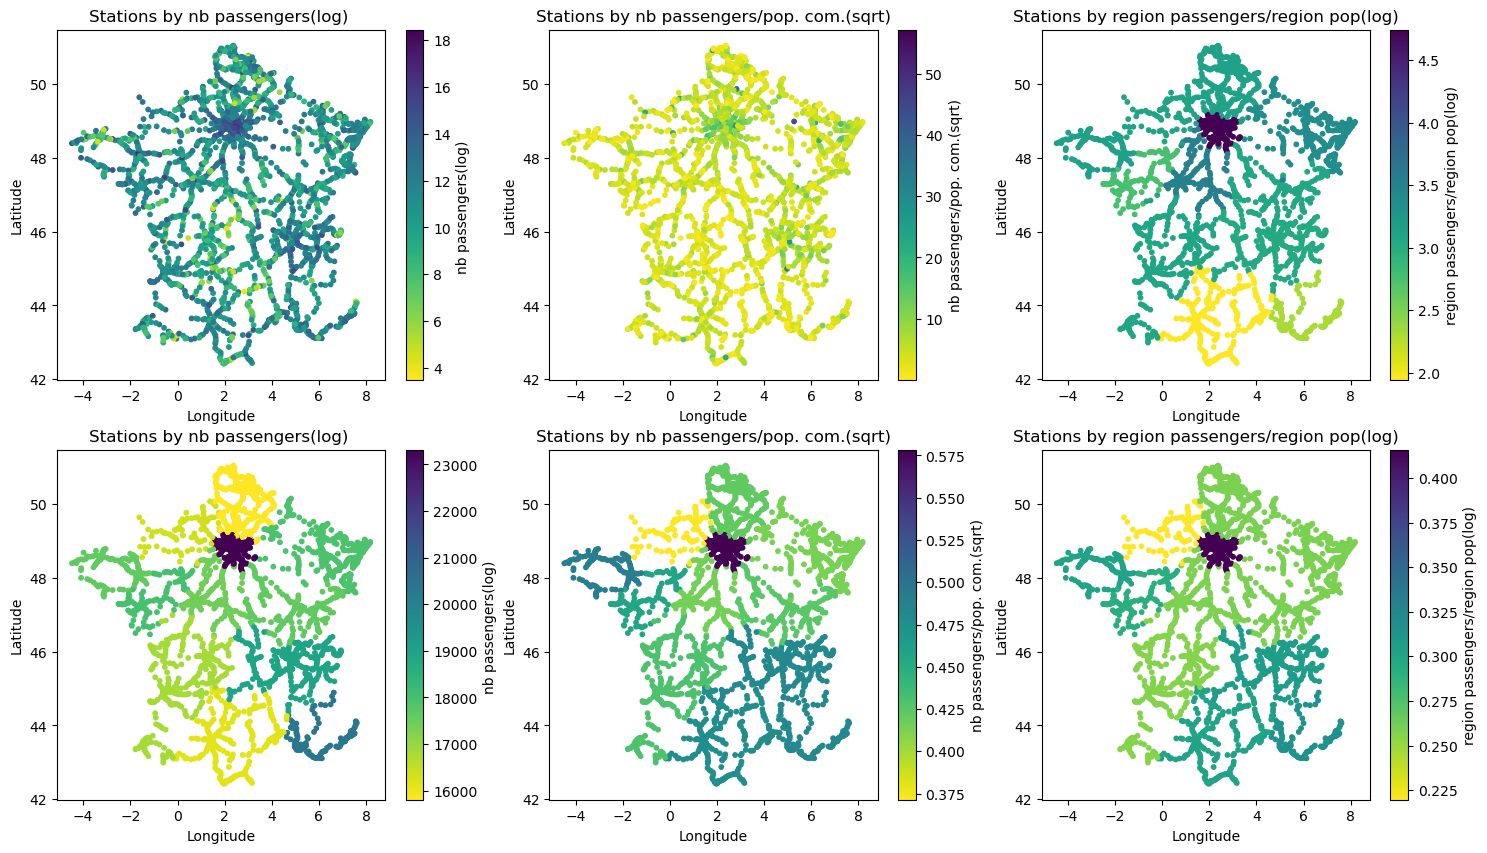

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 1 column of plots
suffix_description00="nb passengers(log) "
suffix_description01="nb passengers/pop. com.(sqrt)"
suffix_description02="region passengers/region pop(log)"
suffix_description10="avg revenue in euros "
suffix_description11="avg prct bac"
suffix_description12="avg prct sup"
plot_map_with_legend(axs[0,0], no_outliers_table['lon_gare'], no_outliers_table['lat_gare'], np.log(no_outliers_table['total_voyageurs_2022']),suffix_description=suffix_description00)
plot_map_with_legend(axs[0,1], no_outliers_table['lon_gare'], no_outliers_table['lat_gare'], np.sqrt(no_outliers_table['total_voyageurs_2022'] / no_outliers_table["pop2022"]),suffix_description=suffix_description01)
plot_map_with_legend(axs[0,2], no_outliers_table['lon_gare'], no_outliers_table['lat_gare'], np.log(no_outliers_table['sum_voy_region'] / no_outliers_table["sum_pop_region"]),suffix_description=suffix_description02)

plot_map_with_legend(axs[1,0], no_outliers_table['lon_gare'], no_outliers_table['lat_gare'], (no_outliers_table['avg_rev_region']),suffix_description=suffix_description10)
plot_map_with_legend(axs[1,1], no_outliers_table['lon_gare'], no_outliers_table['lat_gare'], no_outliers_table['avg_pbac_region'],suffix_description=suffix_description11)
plot_map_with_legend(axs[1,2], no_outliers_table['lon_gare'], no_outliers_table['lat_gare'], no_outliers_table['avg_psup_region'],suffix_description=suffix_description12)
